The columns "TV", "radio" and "newspaper" are in `1000$` and the column "sales" is in `million$`

**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing the dataset**

In [3]:
# Units of TV,radio and newspaper are given in thousand dollar and sales is given in million dollar
df = pd.read_csv('Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### EDA

We are not going into the details of the EDA process.

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape # 200 rows and 4 columns

(200, 4)

In [6]:
df.isna().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

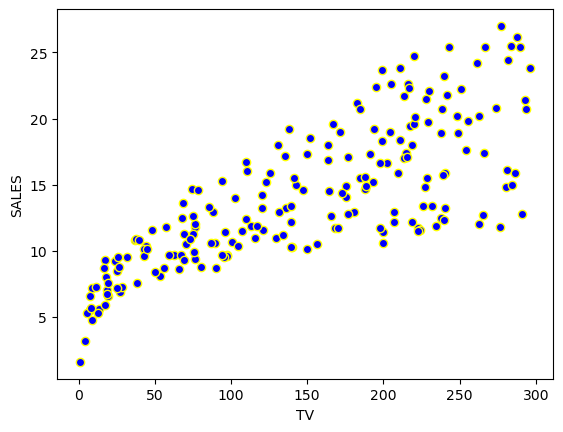

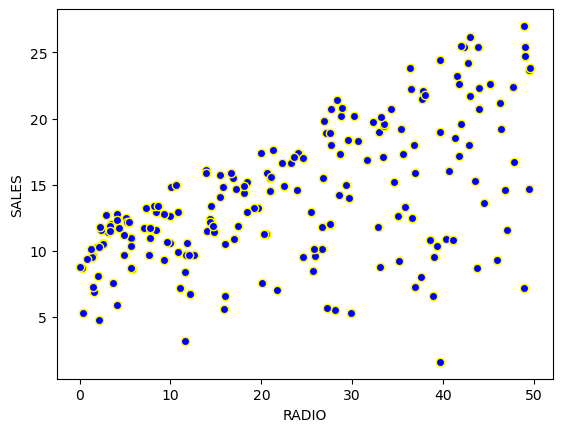

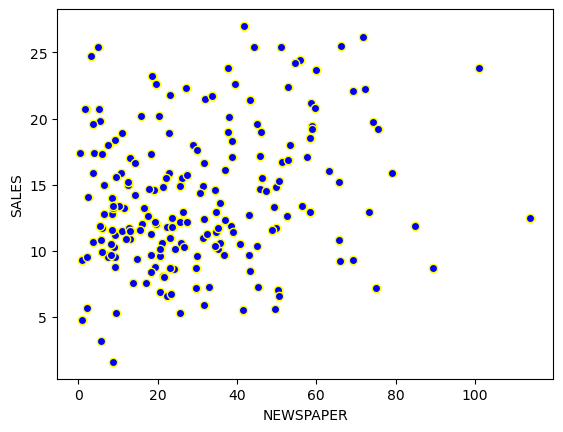

In [7]:

plt.scatter(df['TV'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel('TV')
plt.ylabel("SALES")
plt.show()

plt.scatter(df['radio'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel("RADIO")
plt.ylabel("SALES")
plt.show()


plt.scatter(df['newspaper'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel("NEWSPAPER")
plt.ylabel("SALES")
plt.show()

In [8]:
df.sales.min(),df.sales.max()

(1.6, 27.0)

### Simple Linear Regression

Since we are performing simple linear regression, only one feature has been taken for prediction.

In [8]:
feature_cols = ['TV'] # since we are doing simple linear regression, I have taken only one feature
X = df[feature_cols]
y = df.sales

**Train Test Split**<br>
We are splitting the dataset in 70-30 ratio for train-test set.

In [9]:
# Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (140, 1)
Shape of y_train is (140,)
Shape of X_test is (60, 1)
Shape of y_test is (60,)


In [11]:
X_train

,TV
170,284.3
98,184.9
32,112.9
13,23.8
36,290.7
...,...
107,25.0
15,204.1
93,217.7
180,165.6


**Fitting the model to our training data**

In [12]:
from sklearn.linear_model import LinearRegression
lm =  LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**Checking the intercept and coefficient**

In [14]:
print(f"The intercept is {lm.intercept_}") # Gives the intercept
print(f"The coefficient is {lm.coef_}") # Gives the coefficient

The intercept is 7.23945983075114
The coefficient is [0.0464078]


equation

y = 0.0464078x + 7.23945983075114

**Prediction for train and test dataset**

In [15]:
preds_train = lm.predict(X_train)
preds_test = lm.predict(X_test)

In [16]:
preds_train

array([20.43319798, 15.82026244, 12.47890069,  8.34396552, 20.73020791,
        8.13977119, 20.86479054,  8.10728573, 13.47202766,  8.42749957,
       11.89880316, 10.96136556, 15.98268975, 15.45364081, 13.07292056,
       16.96653516, 13.87113475, 15.82026244, 17.56055502, 18.45622561,
        8.03767403, 12.83159999, 11.40223968, 16.10799082, 10.74324889,
       16.2054472 , 11.21660847, 19.62570222,  9.07256801, 19.36581853,
        7.85204282, 16.2286511 , 20.99473238, 19.56537208, 17.20321495,
       14.18670781, 13.35136737,  9.90790845, 18.38197312, 13.79688227,
       15.62999046, 11.7502982 , 17.4723802 , 13.75047447, 19.09201249,
       11.7038904 , 10.30701555, 18.34484688, 15.39331066, 18.38197312,
        8.07015949, 17.9178951 , 20.40071251, 15.18911634, 16.47925323,
       12.95226027, 13.32352269,  8.40429566, 14.82713548, 18.785721  ,
       16.63703976,  7.84740204,  7.42973182, 11.59715245, 19.44007101,
       17.83436106, 19.01776001, 18.52583731, 18.36805078, 17.82

**Assessing model performance through various metrics**

In [16]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"RMSE for train data is : {np.sqrt(mean_squared_error(y_train,preds_train))}")
print(f"R2 for train data is {r2_score(y_train,preds_train)}")
print(f"RMSE for test data is : {np.sqrt(mean_squared_error(y_test,preds_test))}")
print(f"R2 for test data is {r2_score(y_test,preds_test)}")


RMSE for train data is : 3.3450117024237263
R2 for train data is 0.5736021199591975
RMSE for test data is : 2.995161304907236
R2 for test data is 0.6714477229302764


Text(0, 0.5, 'Sales')

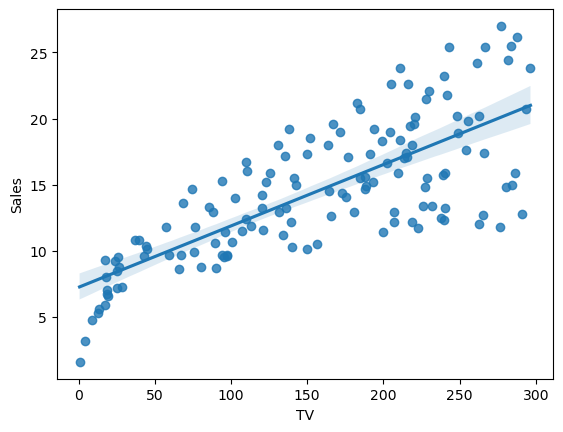

In [17]:
sns.regplot(x=np.reshape(X_train,newshape=(140,)),y=np.reshape(y_train,newshape=(140,)))
plt.xlabel("TV")
plt.ylabel("Sales")

In [18]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Simple Linear Regression using statsmodels


In [19]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)  # This gives the intercept
model = sm.OLS(y_train,x_train).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     185.6
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.55e-27
Time:                        08:58:52   Log-Likelihood:                -367.70
No. Observations:                 140   AIC:                             739.4
Df Residuals:                     138   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2395      0.604     11.986      0.0

In [1]:
# Write the interpretation from this summary


## Multiple Linear Regression

**Using multiple linear regression**

In [1]:
feature_cols = ['TV','radio','newspaper']
x = df[feature_cols]
y = df.sales

NameError: name 'df' is not defined

**Train-test split**

In [ ]:
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size=0.3,random_state=42)

**Standardizing the dataset**)

In Python's scikit-learn library, the StandardScaler module is used for scaling features to zero mean and unit variance. This process is commonly known as standardization and is a critical step in data preprocessing, especially for machine learning algorithms that are sensitive to the scale of input features, like Support Vector Machines (SVMs) and neural networks.

How StandardScaler Works:
Fit: Compute the mean (μ) and standard deviation (σ) for each feature in the training dataset.
Transform: Scale each feature (x) in the dataset to 
𝑧
=
(
𝑥
−
𝜇
)
𝜎
z= 
σ
(x−μ)
​
 , where x is a feature value, μ is the mean of the feature, and σ is the standard deviation of the feature. This transformation changes the distribution of the feature to have a mean of zero and a standard deviation of one.
Example:
Consider a dataset with one feature having values [1, 2, 3]. Here’s how StandardScaler would standardize the data:

Mean (μ) = (1+2+3)/3 = 2
Standard Deviation (σ) = sqrt([(1-2)^2 + (2-2)^2 + (3-2)^2]/3) = 1
Standardized data = [(1-2)/1, (2-2)/1, (3-2)/1] = [-1, 0, 1]
By standardizing features, you ensure that the model treats all features equally, especially in terms of their scale, improving the performance and stability of the learning algorithm.



Certainly! Let's dive deeper into the mechanics and implications of using `StandardScaler` from the `scikit-learn` preprocessing module, particularly focusing on its mathematical basis, practical use cases, and some nuances that affect its performance in real-world applications.

### Mathematical Basis

The `StandardScaler` performs a process known as **Z-score normalization** or standardization, where the values for each feature in the data are adjusted based on the mean and standard deviation of the feature. The formula for standardizing a value \( x \) is given by:

\[
z = \frac{(x - \mu)}{\sigma}
\]

where:
- \( \mu \) is the mean of the feature values.
- \( \sigma \) is the standard deviation of the feature values.

This formula transforms the data in such a way that the resulting feature has a mean of zero and a standard deviation of one. This transformation is crucial for many machine learning algorithms for several reasons:
- **Scale Invariance:** Some algorithms, like SVM and k-means clustering, assume that all features operate on the same scale. If one feature has a range from 0 to 1 and another from 100 to 1000, the latter feature would dominate the learning process.
- **Improved Convergence:** Gradient descent, which is used in training models like linear regression and neural networks, converges faster if features are scaled properly.

### Practical Use Cases

1. **Preprocessing for Machine Learning:** Almost all machine learning algorithms in `scikit-learn` benefit from feature scaling, especially those that use distance calculations or gradients in their computations.
2. **Anomaly Detection:** When features are standardized, it becomes easier to identify outliers since a standardized scale means that a deviation of more than a few units is significant.
3. **Data Visualization:** Standardizing can help in plotting features on the same scale, making it easier to visualize relationships and patterns.

### Implementation in Python

Using `StandardScaler` involves two main steps: fitting and transforming. Here's an expanded example:

```python
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suppose we have the following dataset
data = np.array([[50, 2], [60, 4], [70, 6], [80, 8]])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data - this calculates the mean and standard deviation
scaler.fit(data)

# See the mean and standard deviation
print("Mean:", scaler.mean_)
print("Standard deviation:", scaler.scale_)

# Transform the data using the fitted scaler
scaled_data = scaler.transform(data)
print("Scaled data:", scaled_data)

# Optionally, fit and transform can be done in one step
scaled_data_direct = scaler.fit_transform(data)
print("Directly scaled data:", scaled_data_direct)
```

### Nuances and Considerations

- **Sensitivity to Outliers:** Since the scaling is influenced by the mean and standard deviation, outliers can skew the transformed data significantly. In such cases, using `RobustScaler`, which uses the median and the quartile range, might be more appropriate.
- **Reversibility:** The scaling process is reversible. You can reconstruct the original data using the inverse transform method, which is essential for interpreting model results directly in the original units of measurement.

This deeper understanding highlights the importance of correctly applying `StandardScaler` in your data preprocessing pipeline to ensure optimal performance of your machine learning models.


Here's an example of how to use StandardScaler in Python:

In [23]:
from sklearn.preprocessing import StandardScaler # fit vs transform vs fit_transform
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

NameError: name 'xtrain' is not defined

In [22]:
xtrain

NameError: name 'xtrain' is not defined

**Training the model**

In [21]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

NameError: name 'xtrain' is not defined

**Checking the intercept and the coefficients**

In [ ]:
print(lm.intercept_)
print(lm.coef_)

**Prediction**

In [ ]:
preds_train = lm.predict(xtrain)
preds_test = lm.predict(xtest)

**Assessing the model performance through various metrics**

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f"RMSE for train data is : {np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f"R2 for train data is {r2_score(ytrain,preds_train)}")
print(f"RMSE for test data is : {np.sqrt(mean_squared_error(ytest,preds_test))}")
print(f"R2 for test data is {r2_score(ytest,preds_test)}")


RMSE for train data is : 1.5745968305905444
R2 for train data is 0.9055159502227753
RMSE for test data is : 1.9485372043446387
R2 for test data is 0.8609466508230368


<b>Note: Now draw comparision between the simple linear regression model and the multiple linear regression model.

### Multiple Linear Regression using statsmodels

In [42]:
import statsmodels.api as sm
xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain,xtrain).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.88e-69
Time:                        18:06:13   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4971      0.135    107.370      0.000      14.230      14.764
x1             3.6833      0.135     27.219      0.000       3.416       3.951
x2             2.9063      0.144     20.195      0.000       2.622       3.191
x3             0.1419      0.144      0.988      0.325      -0.142       0.426
==============================================================================
Omnibus:                       68.437   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.342
Skew:                          -1.709   Prob(JB):                     2.25e-71
Kurtosis:                       9.640   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model.rsquared

0.9055159502227753

In [ ]:
# write the interpretation from this summary

#### Try fitting the model with "TV" and "radio" only

## Check the assumptions of Linear Regression